<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial Notebook</h1>




Notebook 3: Benchmark

# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/

This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.2

In [ ]:
%pip install -U ipywidgets

In [3]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 6.&nbsp;Benchmarking Imputation Algorithms

ImputeGAP can serve as a common test-bed for comparing the effectiveness and efficiency of time series imputation algorithms. Users have full control over the benchmark by customizing various parameters, including the list of the algorithms to compare, the optimizer, the datasets to evaluate, the missingness patterns, the range of missing values, and the performance metrics.

## 6.2&nbsp;Benchmark with Default Parameters

The benchmarking module can be utilized as follows:

In [71]:
from imputegap.recovery.benchmark import Benchmark
from imputegap.tools import utils

my_algorithms = ["MeanImpute", "SoftImpute"]

my_opt = "default_params"

my_datasets = ["eeg-alcohol"]

my_patterns = ["mcar"]

range = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=range, optimizer=my_opt)


The benchmark has been called:
	algorithms: ['MeanImpute', 'SoftImpute']
	datasets: ['eeg-alcohol']
	patterns: ['mcar']
	missing_percentages: [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
	optimizer: default_params
	normalizer: z_score
	runs: 1
	number max series: 200
	number max values: 2000


MeanImpute is tested with mcar on eeg-alcohol, started at 2026-01-22 16:09:49.
done!


SoftImpute is tested with mcar on eeg-alcohol, started at 2026-01-22 16:09:56.
done!



> logs: benchmark - Execution Time: 19.9681 seconds


eegalcohol: {mcar, RMSE, default_params}

 Rate       MeanImpute          SoftImpute     

 0.05      0.9945302343        0.5022733403    
  0.1      0.8081365539        0.3797954812    
  0.2      0.9727791074        0.4246409227    
  0.4      0.9879033826        0.4334707248    
  0.6      0.9900236459        0.4469672608    
  0.8      0.9947606840        0.4811537021    



eegalcohol: {mcar, RUNTIME[ms], default_params}

 Rate       MeanImpute          SoftImpute     

 0.05   

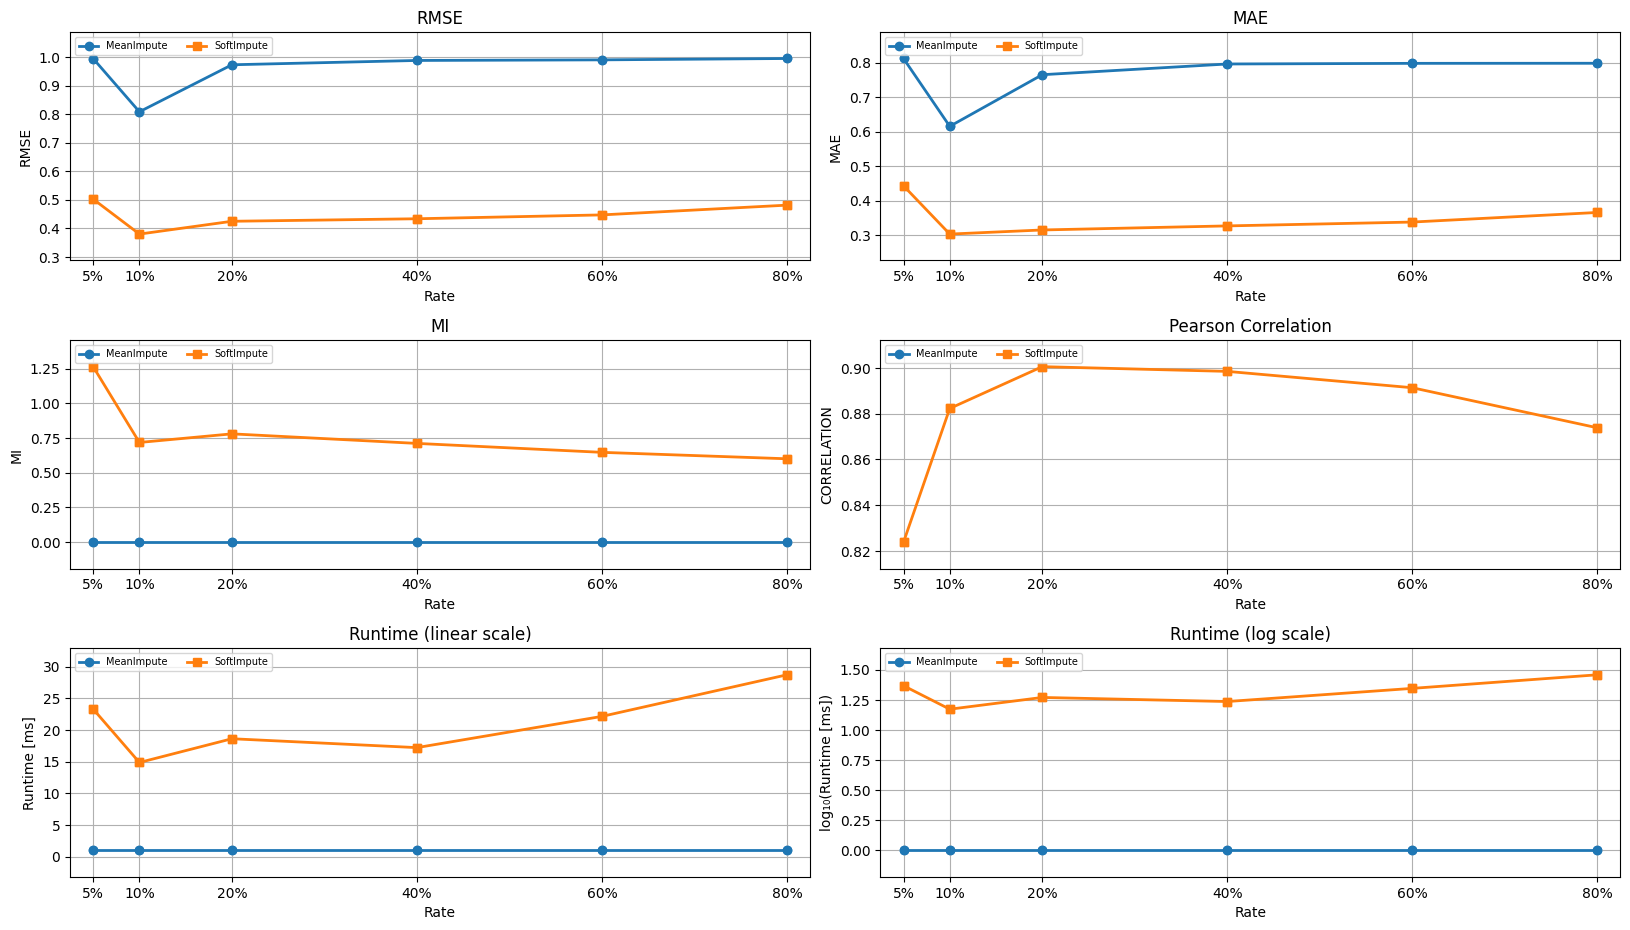

In [72]:
%matplotlib inline
bench.subplots.show()

More recent techniques such as LLMs, can be added to the benchmark. To do so, we will compare the performance of GPT4TS and CDREC, with default parameters, on the chlorine dataset contaminated with the aligned pattern.

In [73]:
from imputegap.recovery.benchmark import Benchmark

my_algorithms = ["GPT4TS", "CDRec"]

my_opt = "default_params"

my_datasets = ["chlorine"]

my_patterns = ["mcar"]

range = [0.1, 0.2]

my_metrics = ["*"]

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=range, metrics=my_metrics, optimizer=my_opt)


The benchmark has been called:
	algorithms: ['GPT4TS', 'CDRec']
	datasets: ['chlorine']
	patterns: ['mcar']
	missing_percentages: [0.1, 0.2]
	optimizer: default_params
	normalizer: z_score
	runs: 1
	number max series: 200
	number max values: 2000


GPT4TS is tested with mcar on chlorine, started at 2026-01-22 16:10:44.
done!


CDRec is tested with mcar on chlorine, started at 2026-01-22 16:12:29.
done!



> logs: benchmark - Execution Time: 109.6731 seconds


chlorine: {mcar, RMSE, default_params}

 Rate         CDRec               GPT4TS       

  0.1      0.3411154553        0.1849563179    
  0.2      0.3898293614        0.2575699106    



chlorine: {mcar, RUNTIME[ms], default_params}

 Rate         CDRec               GPT4TS       

  0.1     176.1486530304     56677.3142814636  
  0.2     231.0135364532     45951.5333175659  



The plots have been generated...


{mcar, RMSE, default_params}
--------------------------------------------------------------
   Dataset      Rate     

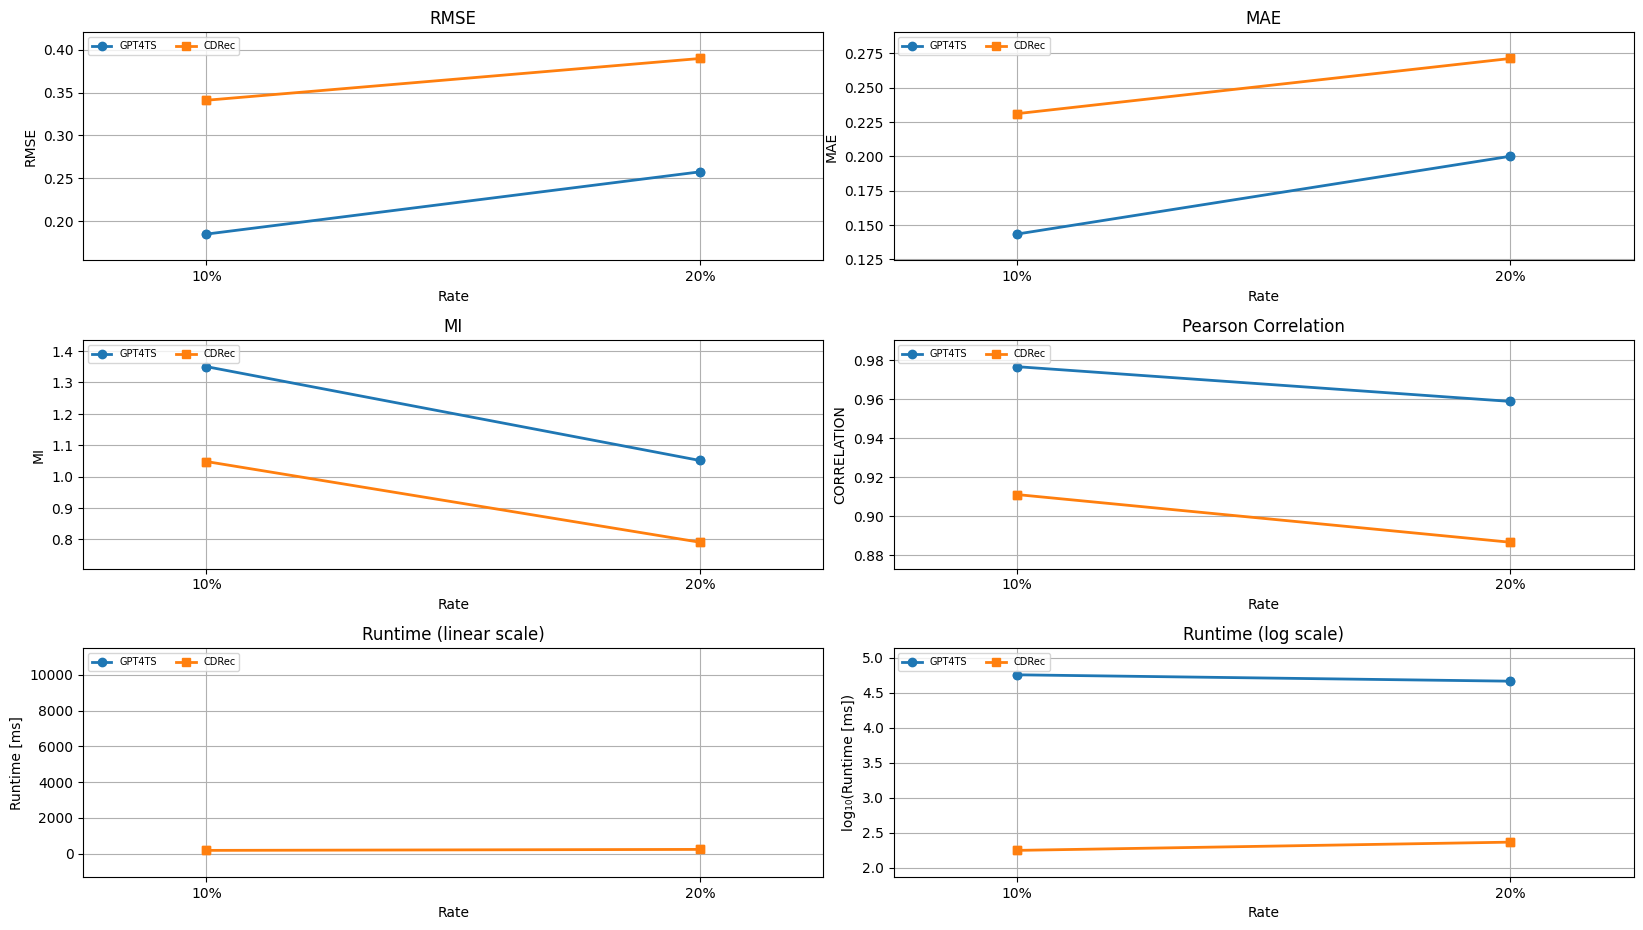

In [75]:
%matplotlib inline
bench.subplots.show()

## 6.2&nbsp;Benchmark with Optimization

In this use-case, we will compare two algorithms MeanImpute and CDRec using  Ray Tune optimizer to find the optimal parameter values.

In [ ]:
from imputegap.recovery.benchmark import Benchmark

my_algorithms = ["MeanImpute", "CDRec"]

my_opt = "ray_tune"

my_datasets = ["eeg-alcohol"]

my_patterns = ["mcar"]

range = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]

my_metrics = ["*"]

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=range, metrics=my_metrics, optimizer=my_opt, nbr_series=12, nbr_vals=100)

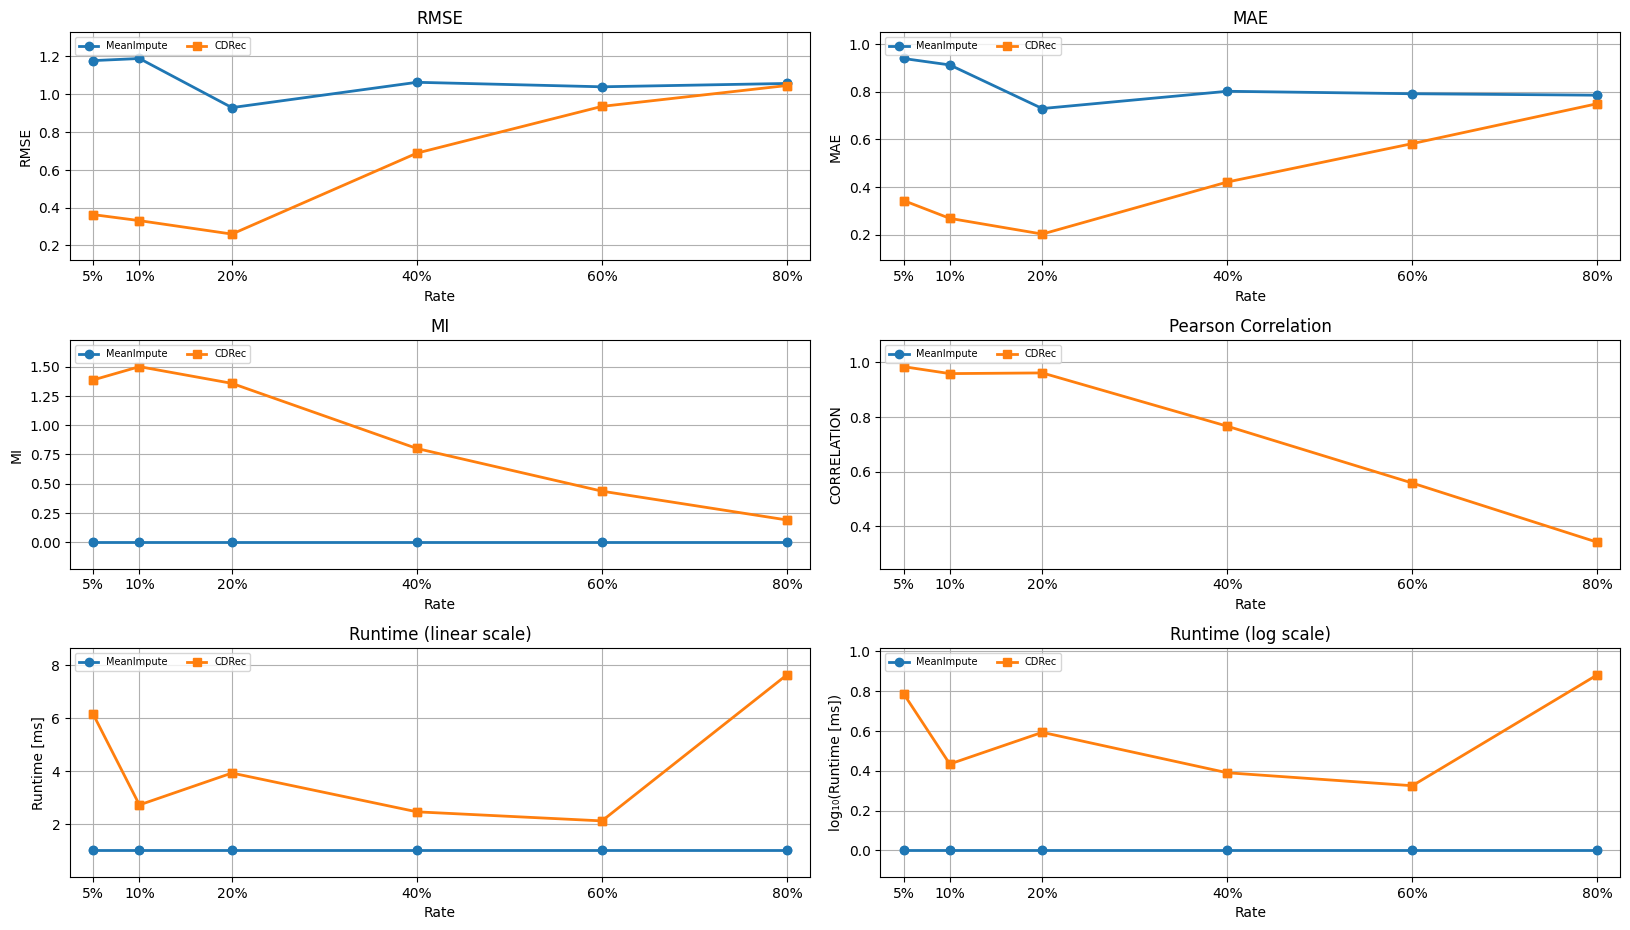

In [78]:
%matplotlib inline
bench.subplots.show()

<br>
More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html